In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import dataframe_image as dfi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from statsmodels.multivariate.pca import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

## Load the Data

In [2]:
file = pd.read_csv("bank_marketing_part1_Data.csv")
#dfi is used to save the dataframe as image for business report
dfi.export(file.head(), 'MAIN file head.png')
# display first five observations using head()
file.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
#to see the datatypes of column
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [4]:
#to see individual 
for i in file.columns.values.tolist():
    print(i,file[i].unique())

spending [19.94 15.99 18.95 10.83 17.99 12.7  12.02 13.74 18.17 11.23 18.55 14.09
 12.15 18.98 12.1  12.79 16.14 10.8  13.22 12.37 13.07 17.98 12.62 15.11
 15.56 12.78 11.02 11.35 13.78 11.84 12.55 15.88 11.82 11.19 11.14 12.22
 11.81 19.51 18.72 13.84 16.87 20.03 10.79 11.18 13.16 19.06 18.96 18.83
 12.73 19.46 19.38 18.81 16.23 12.38 11.83 10.93 18.65 14.79 11.41 11.27
 15.26 14.34 18.85 20.71 14.11 19.15 12.19 13.54 12.49 20.1  20.2  13.34
 18.94 15.03 12.13 16.82 14.29 14.52 12.88 13.94 18.59 10.91 14.49 16.63
 15.38 16.17 13.2  13.99 21.18 11.87 18.43 19.57 16.16 10.82 17.63 13.37
 19.31 18.89 15.69 18.36 13.32 12.8  18.75 15.6  14.33 20.24 12.89 11.21
 17.32 13.5  14.28 11.48 20.97 12.08 11.56 12.46 12.54 15.01 18.3  11.4
 14.46 11.36 14.86 12.36 12.05 19.14 17.55 14.59 15.78 14.92 11.24 11.34
 12.74 19.13 10.74 13.8  12.44 14.16 12.11 14.99 16.2  11.42 14.7  13.02
 11.26 17.36 20.88 12.72 18.88 17.26 18.27 11.65 15.5  15.05 12.76 11.43
 16.19 11.49 14.38 18.45 20.16 19.11 14.69 

In [5]:
data=file.copy()
print("pre null removal\n")
print(data.isna().sum()*100/data.shape[0])

pre null removal

spending                        0.0
advance_payments                0.0
probability_of_full_payment     0.0
current_balance                 0.0
credit_limit                    0.0
min_payment_amt                 0.0
max_spent_in_single_shopping    0.0
dtype: float64


In [6]:
#to see statistical metrics
dfi.export(data.describe(), 'MAIN data describe.png')
data.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


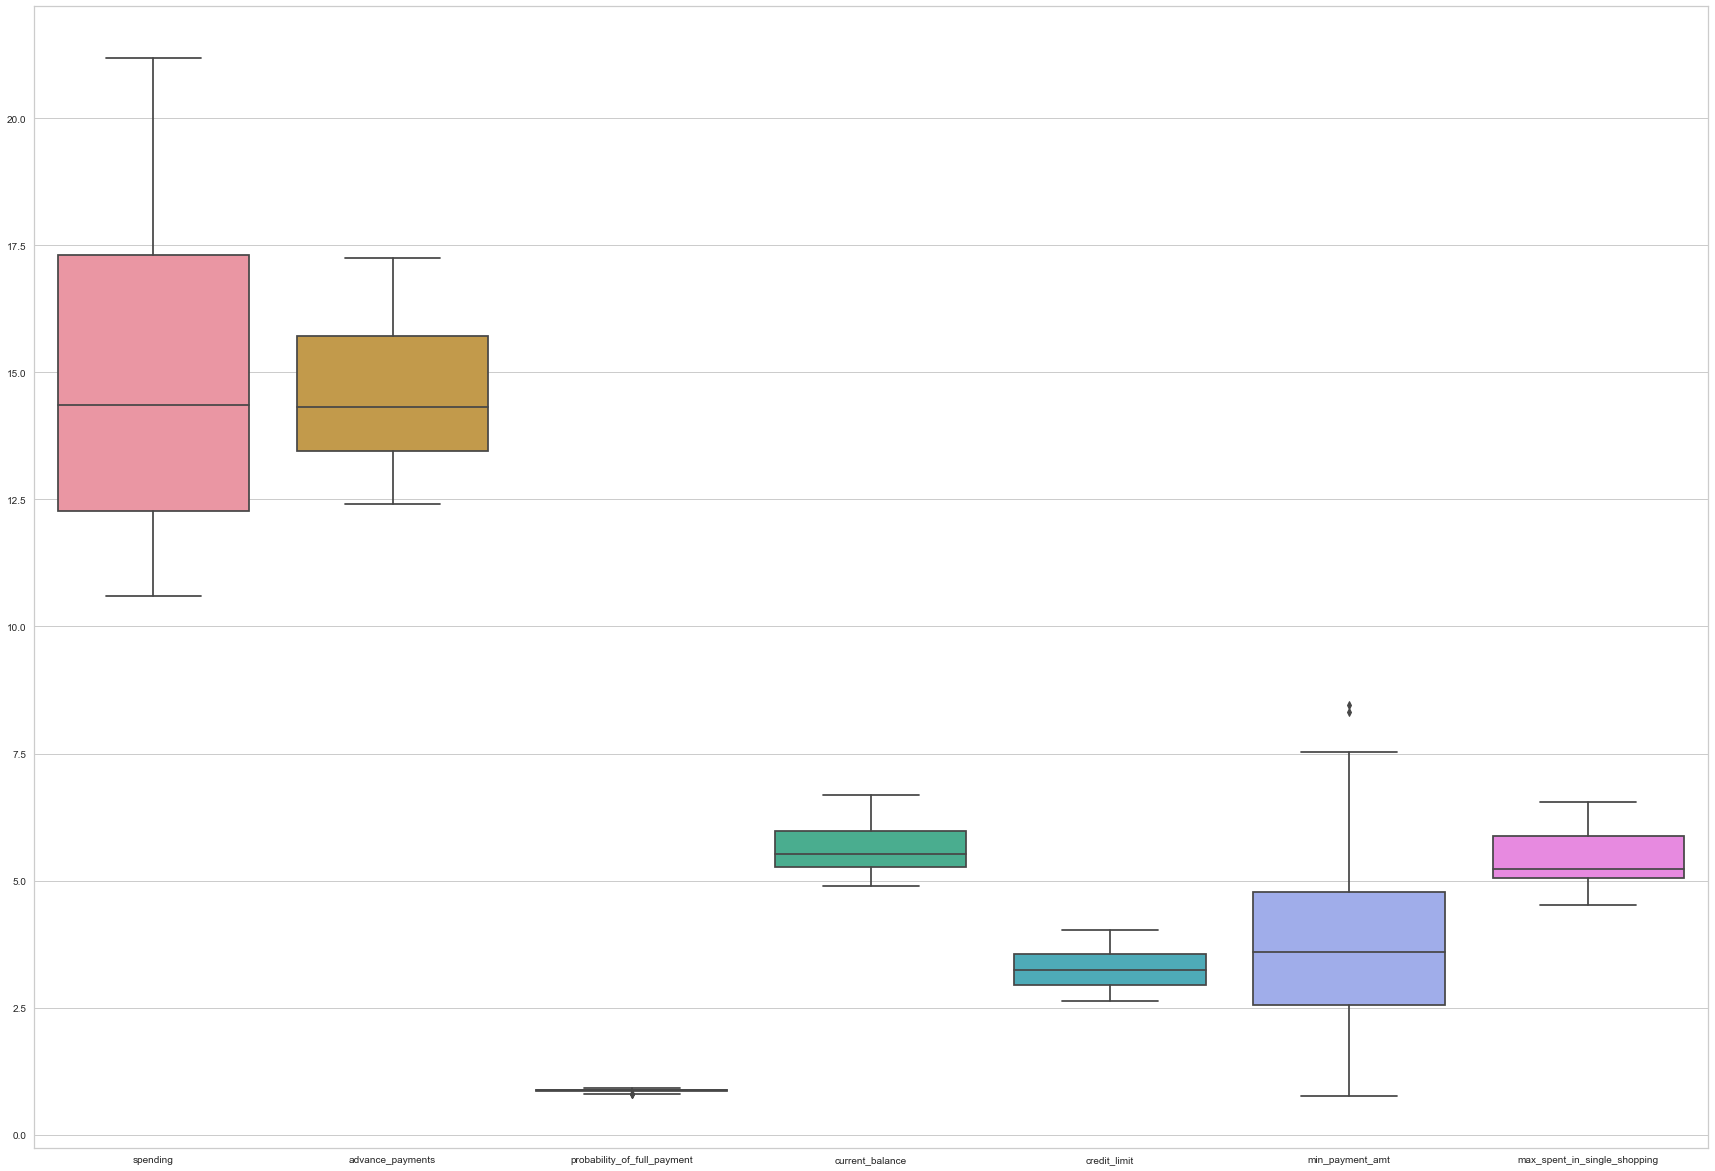

In [7]:
fig = plt.figure(figsize=(30,21))
sns.boxplot(data=data)
fig.savefig('MAIN data boxplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

In [8]:
data.shape

(210, 7)

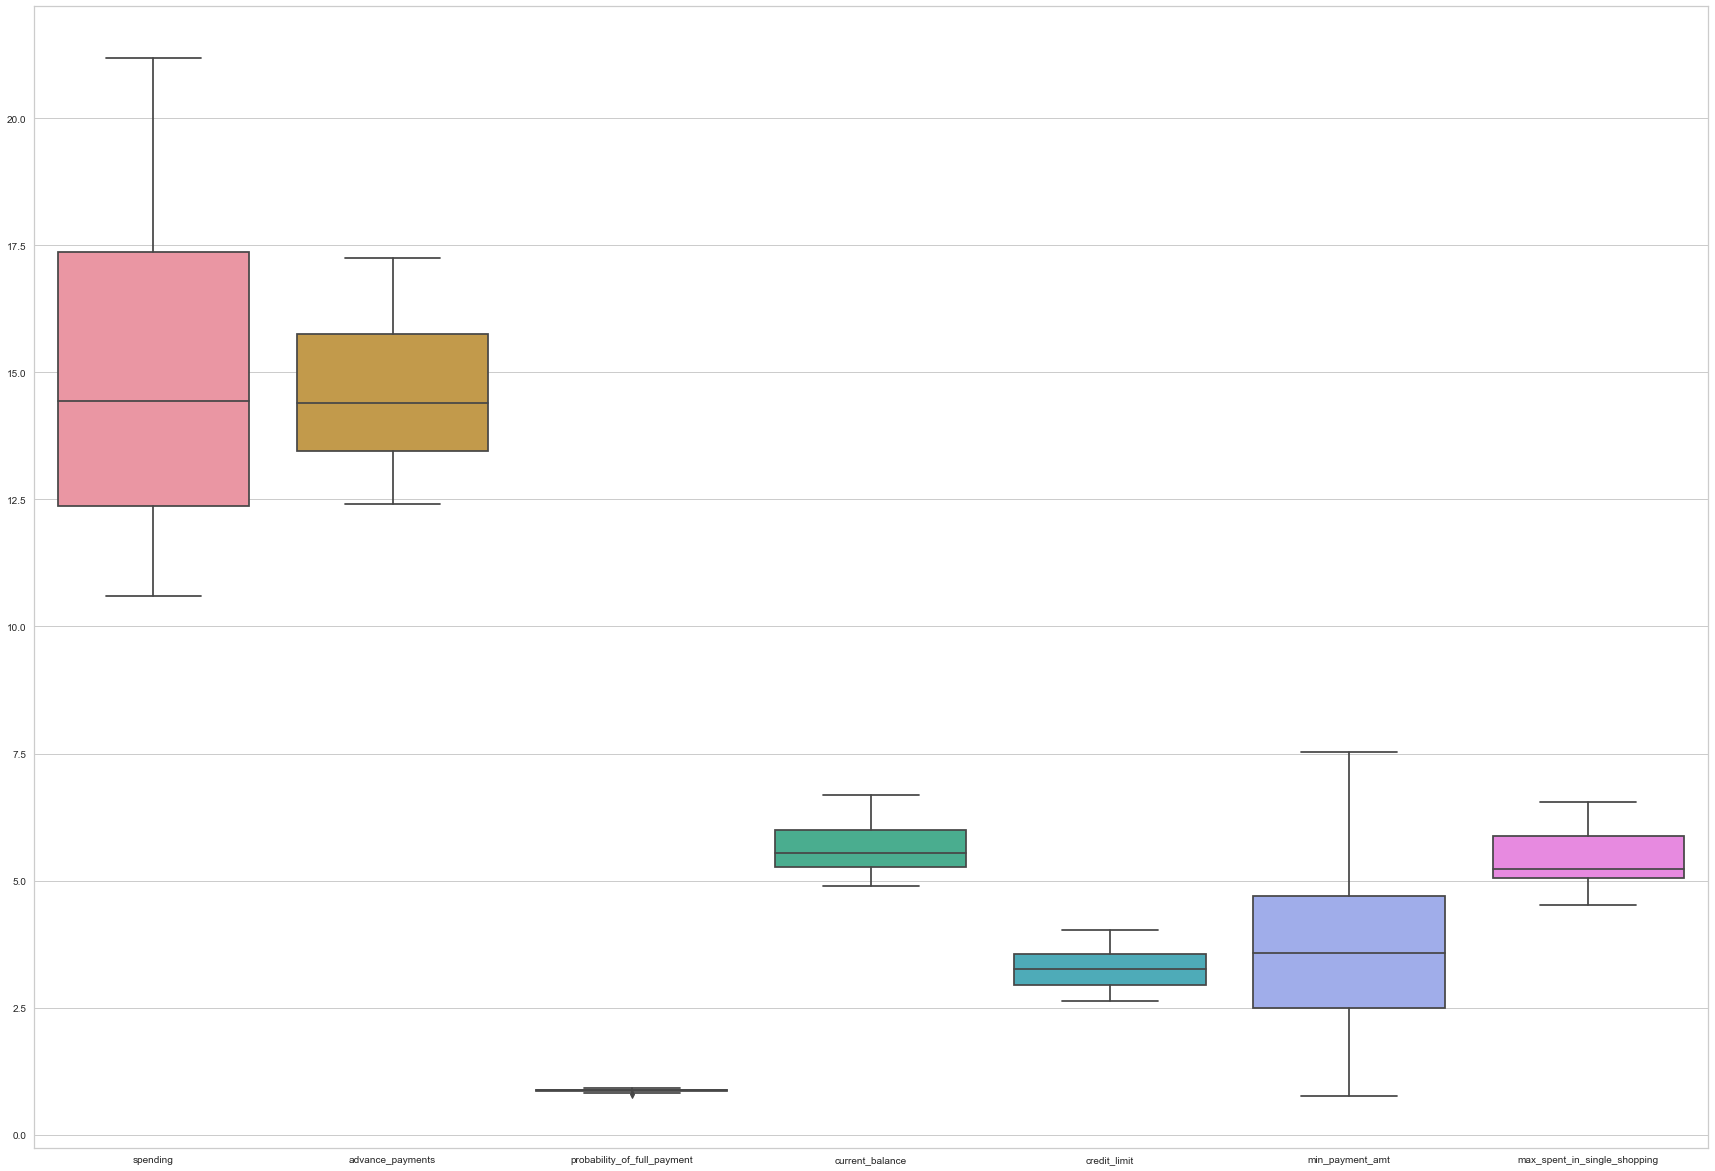

In [9]:
# calculate the first quartile
Q1 = data.quantile(0.25)

# calculate the third quartile
Q3 = data.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

fig = plt.figure(figsize=(30,21))
sns.boxplot(data=data)
fig.savefig('MAIN data_zscore boxplot post.jpg', bbox_inches='tight', dpi=150)
plt.show()

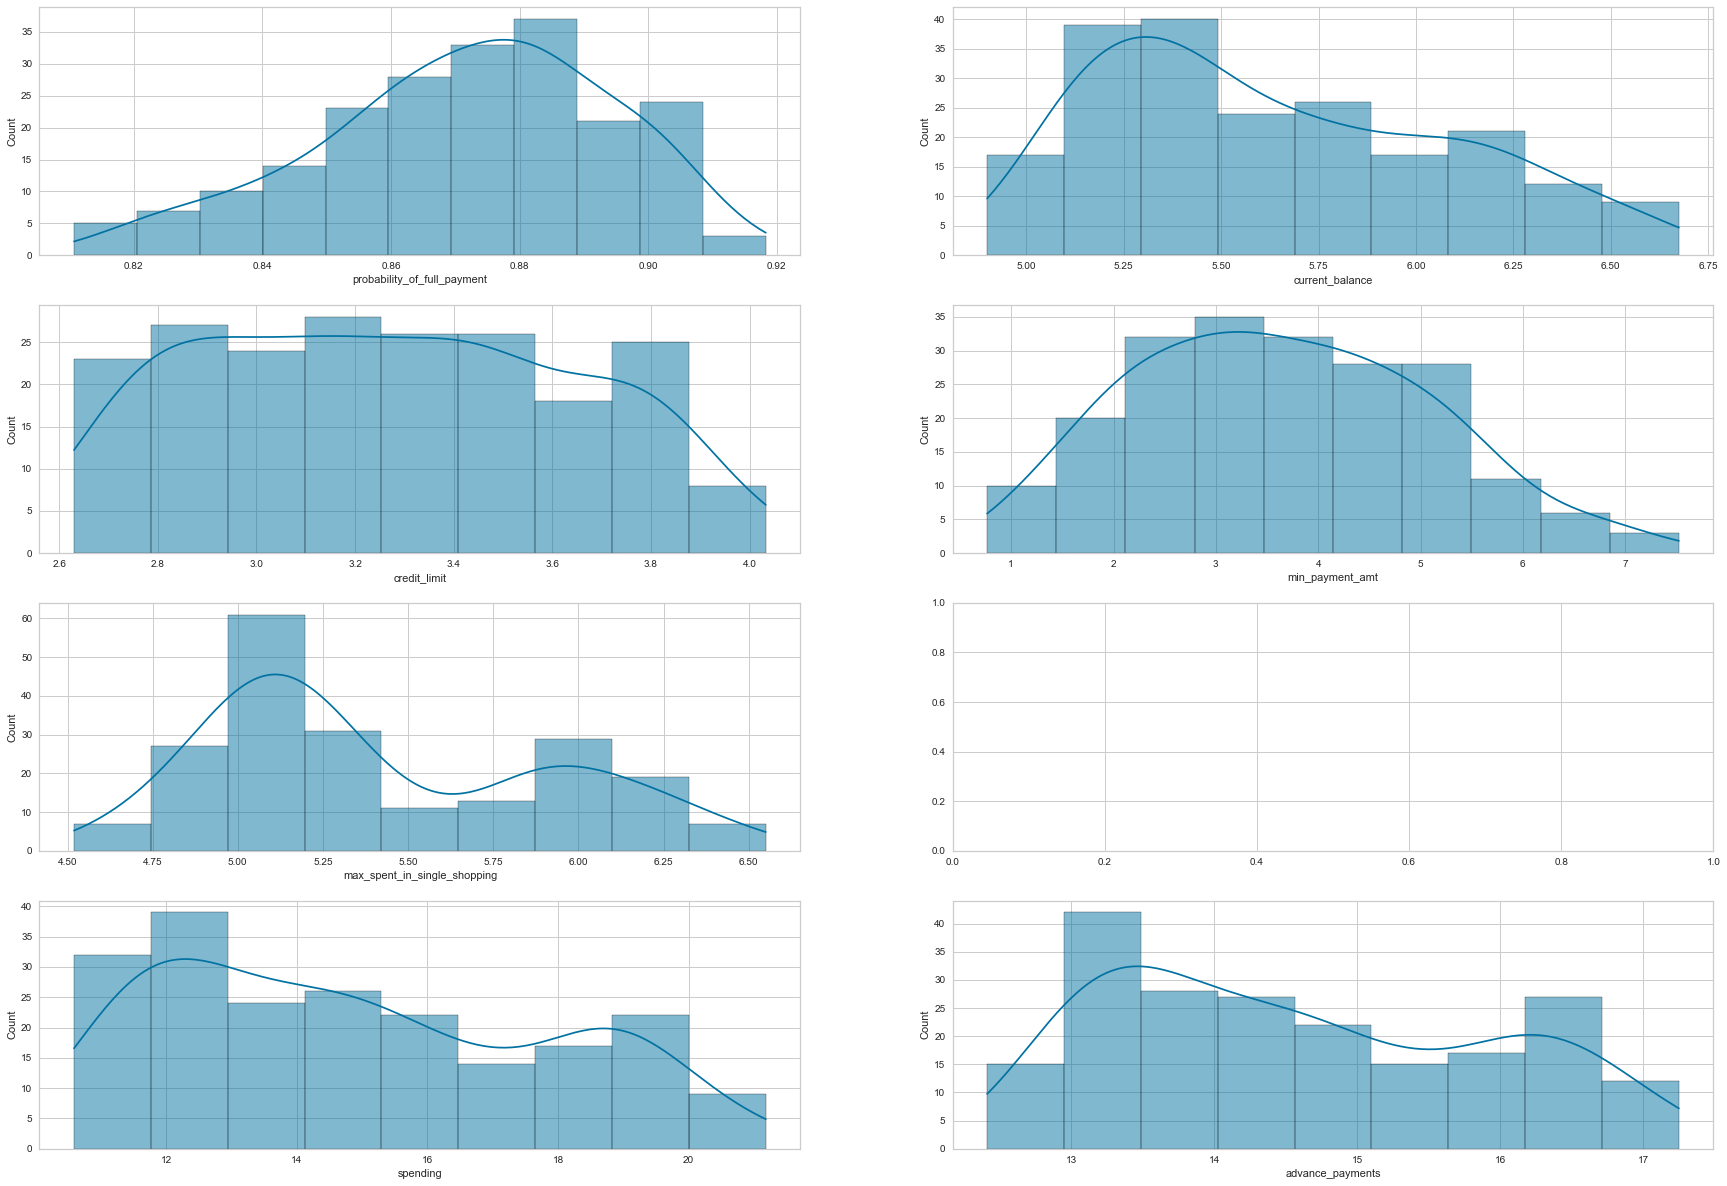

In [10]:
fig, ax = plt.subplots(4, 2,figsize=(30,21))
for i in data.columns.values.tolist():
    q, mod = divmod(data.columns.values.tolist().index(i), 2)
    sns.histplot(data=pd.DataFrame(data),x=i,ax=ax[q-1][mod],kde=True)
fig.savefig('MAIN data histplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

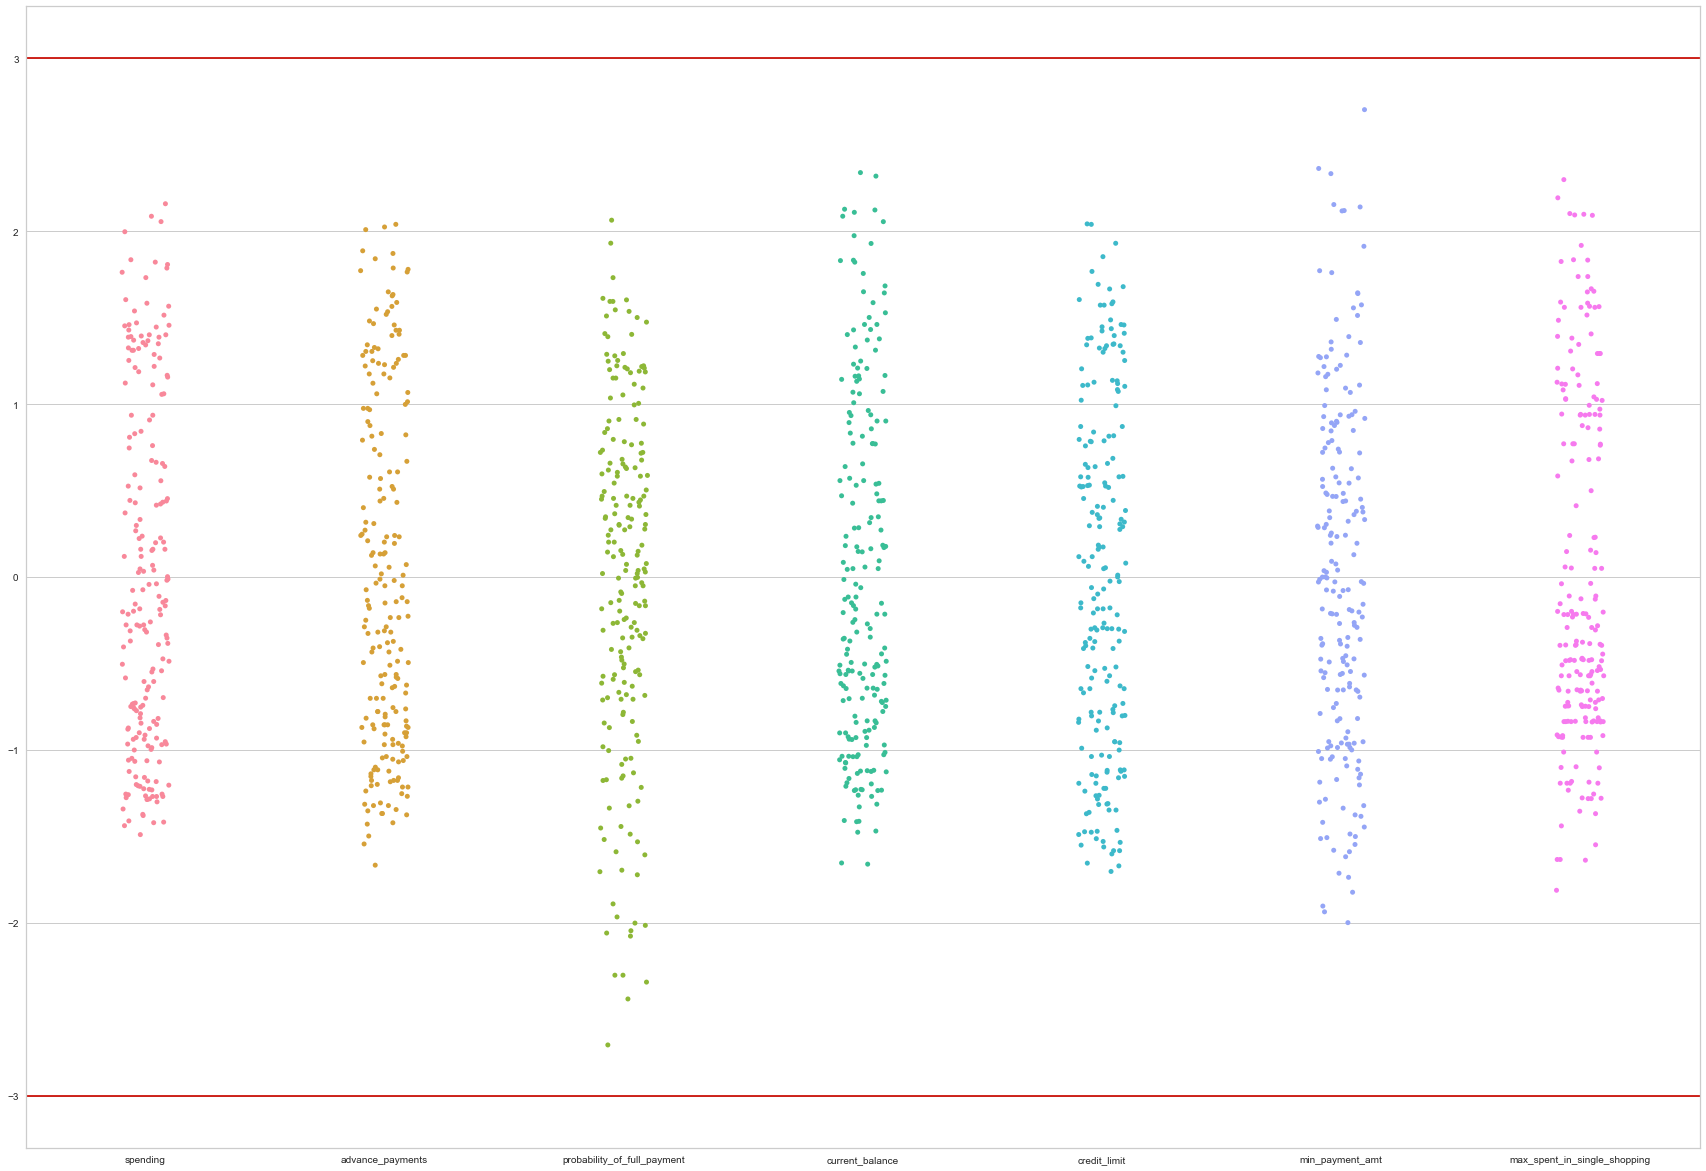

In [11]:
data_zscore=data.apply(zscore)
fig = plt.figure(figsize=(30,21))
sns.stripplot(data=data_zscore)
plt.axhline(y=3, color='r', linestyle='-')
plt.axhline(y=-3, color='r', linestyle='-')
fig.savefig('MAIN data_zscore stripplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

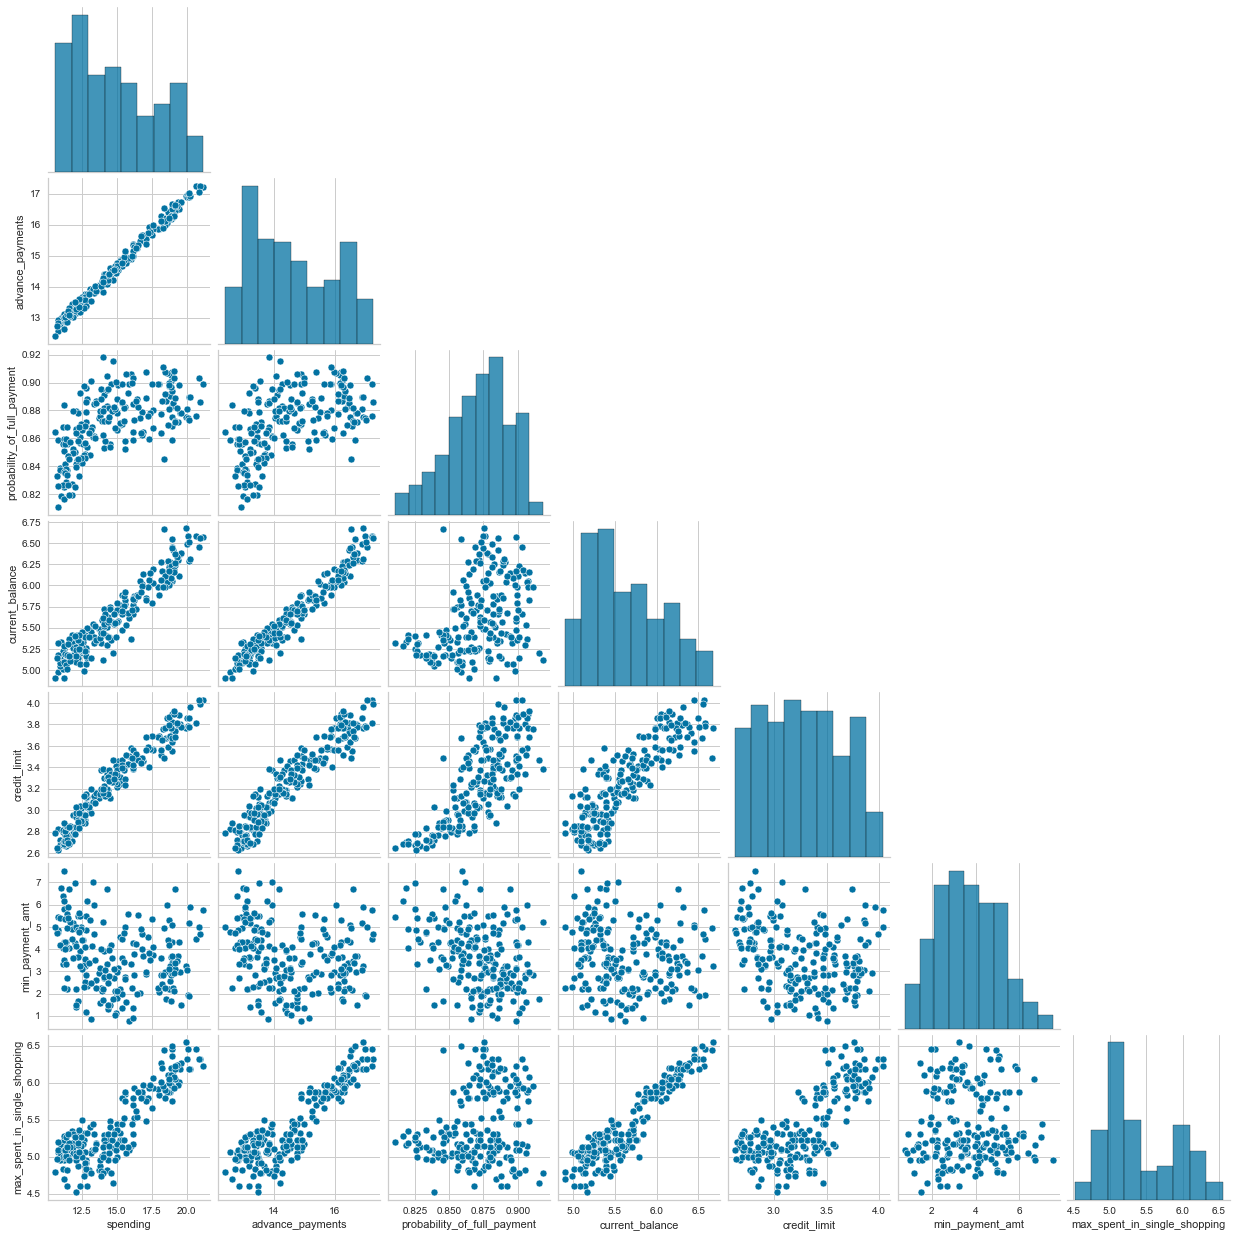

In [12]:
fig=sns.pairplot(data, corner=True)
fig.savefig('MAIN data pairplot.jpg')
plt.show()

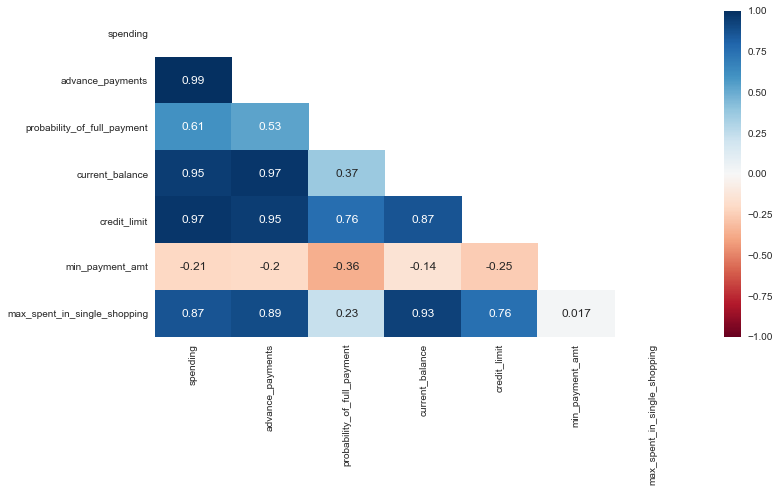

In [13]:
fig=plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool)) 
sns.heatmap(data.corr(),cmap='RdBu',fmt='.2g',annot=True,mask=mask,vmin=-1,vmax=1)
fig.savefig('MAIN data heatmap.jpg', bbox_inches='tight', dpi=150)
plt.show()

In [14]:
chi_square_value,p_value=calculate_bartlett_sphericity(data)
if p_value<.05:
    print("As per bartlett test of ssphericity, PCA is needed\nP value:-",p_value)
else:
    print("As per bartlett test of sphericity, PCA is not needed\nP value:-",p_value)
kmo_all,kmo_model=calculate_kmo(data)
if kmo_model>.5:
    print("As per kmo, PCA is needed\nKMO value:-",kmo_model)
else:
    print("As per kmo,PCA is not needed\nKMO value:-",kmo_model)

As per bartlett test of ssphericity, PCA is needed
P value:- 0.0
As per kmo, PCA is needed
KMO value:- 0.7886104839687765


In [15]:
data_scaled=data.apply(zscore)
cov_matrix = np.cov(data_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
print("\nncomp",np.where(np.cumsum([( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)])>80.0)[0][0]+1)
pc = PCA(data, ncomp=np.where(np.cumsum([( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)])>80.0)[0][0]+1)
data1_comp = pc.loadings.T

Cumulative Variance Explained [ 71.92454095  89.6519977   98.67197884  99.64759624  99.9120898
  99.98838019 100.        ]

ncomp 2


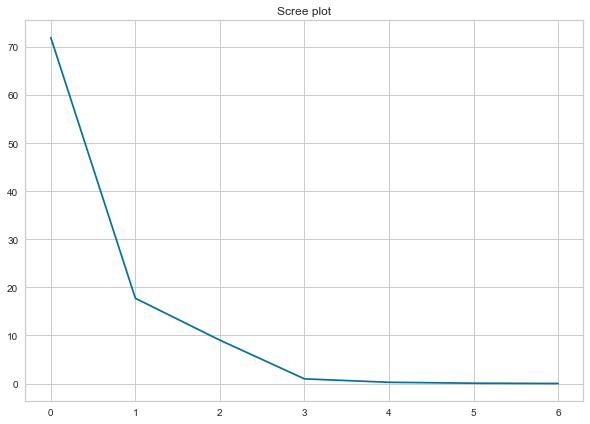

In [16]:
fig=plt.figure(figsize=(10, 7))
plt.plot(range(len(var_exp)),var_exp)
plt.title('Scree plot')
fig.savefig('MAIN Scree plot.jpg', bbox_inches='tight', dpi=150)
plt.show()

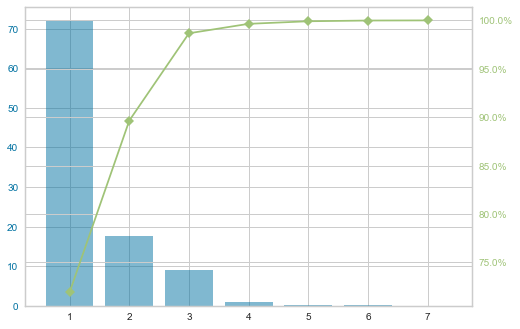

In [17]:
fig, ax = plt.subplots()
ax.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance',color="C0")
ax2 = ax.twinx()
ax2.plot(range(1, eig_vals.size + 1), cum_var_exp, label = 'Cumulative explained variance', color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
fig.savefig('MAIN Pereto.jpg', bbox_inches='tight', dpi=150)
plt.show()

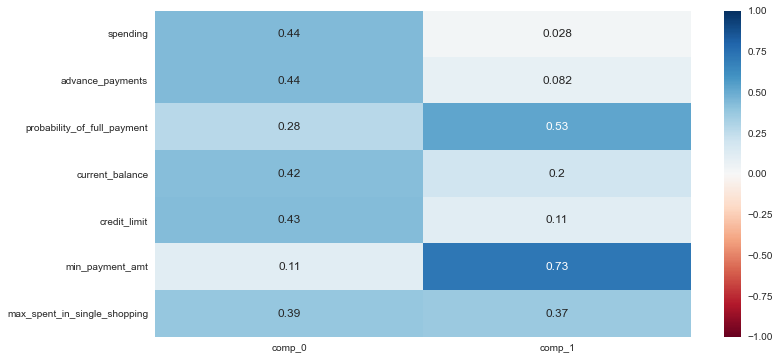

In [18]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(data1_comp.abs().T, annot=True, cmap='RdBu',vmin=-1,vmax=1)
fig.savefig('MAIN data1_comp heatmap.jpg', bbox_inches='tight', dpi=150)
plt.show()

In [19]:
maxValueIndexObj = data1_comp.abs().T.idxmax(axis=1)
print("Max values of row are at following columns :")
print(maxValueIndexObj)

Max values of row are at following columns :
spending                        comp_0
advance_payments                comp_0
probability_of_full_payment     comp_1
current_balance                 comp_0
credit_limit                    comp_0
min_payment_amt                 comp_1
max_spent_in_single_shopping    comp_0
dtype: object


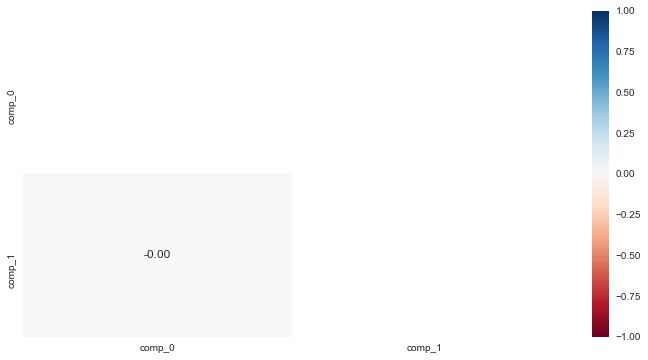

In [20]:
fig=plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(pc.factors.corr(method='pearson'), dtype=np.bool)) 
sns.heatmap(pc.factors.corr(),cmap='RdBu',vmin=-1,vmax=1,fmt='.2f',mask=mask,annot=True)
fig.savefig('MAIN pc factors heatmap.jpg', bbox_inches='tight', dpi=150)
plt.show()

In [21]:
data_old=data.copy()

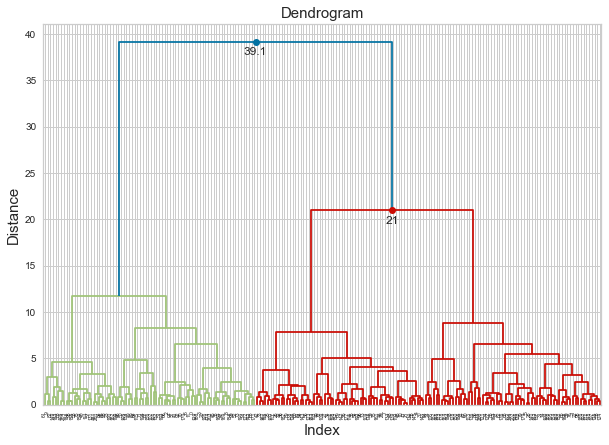

In [22]:
Stand=StandardScaler()
data_Stand=Stand.fit_transform(data)
link_mat = linkage(data_Stand, method = 'ward')     
fig=plt.figure(figsize=(10, 7))
plt.title("Dendrograms")  
dendro = dendrogram(link_mat)
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > 20:
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
fig.savefig('ORI data dend.jpg', bbox_inches='tight', dpi=150)
plt.show()

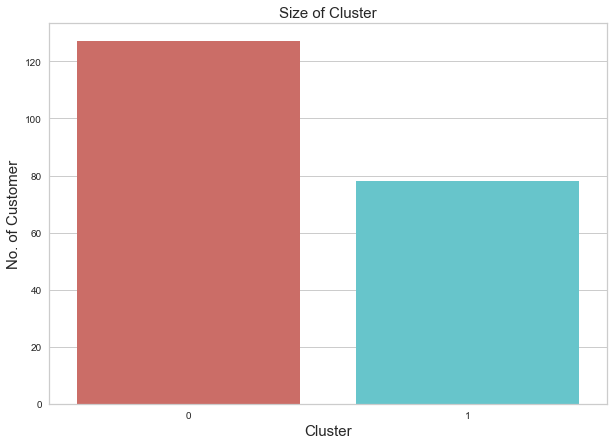

In [23]:
clusters = AgglomerativeClustering(n_clusters=len(list(set(dendro['color_list'])))-1, linkage='ward',affinity='euclidean')
clusters.fit(data_Stand)
data['Agglomerative Cluster'] = clusters.labels_
fig=plt.figure(figsize=(10, 7))
sns.countplot(data = data, x = 'Agglomerative Cluster',palette=sns.color_palette("hls",len(list(set(dendro['color_list'])))-1))
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Customer', fontsize = 15)
fig.savefig('ORI data_zscore Agglomerative Cluster countplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

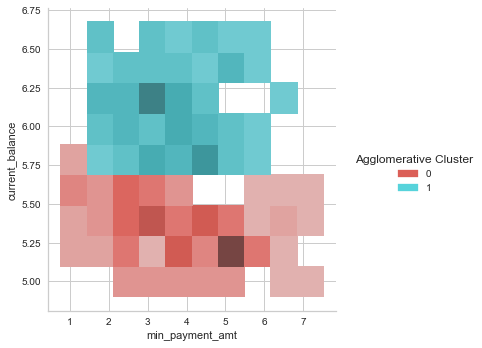

In [24]:
fig=sns.displot(data = data, hue = 'Agglomerative Cluster', x='min_payment_amt',y='current_balance',
                palette=sns.color_palette("hls",len(list(set(dendro['color_list'])))-1))
fig.savefig('ORI data_zscore Agglomerative Cluster displot.jpg', bbox_inches='tight', dpi=150)
plt.show()

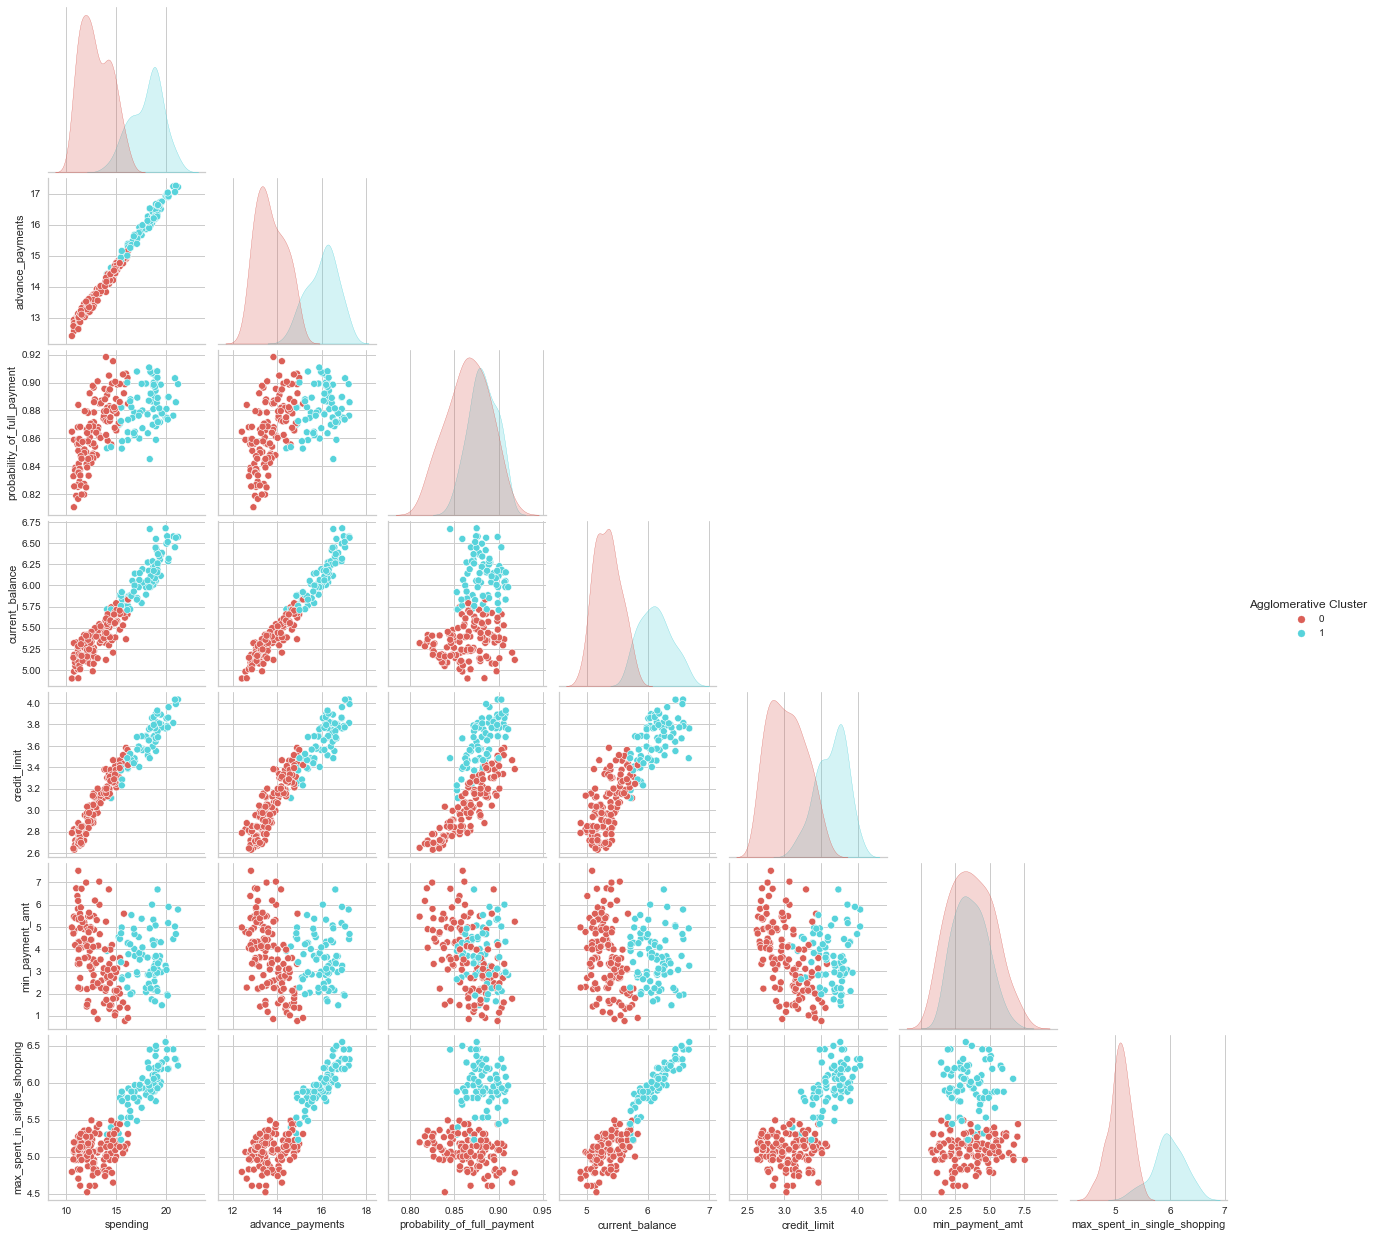

In [25]:
fig=sns.pairplot(data = data, hue = 'Agglomerative Cluster', 
                palette=sns.color_palette("hls",len(list(set(dendro['color_list'])))-1), corner=True)
fig.savefig('ORI data_zscore Agglomerative Cluster pairplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

Number of clusters = 3


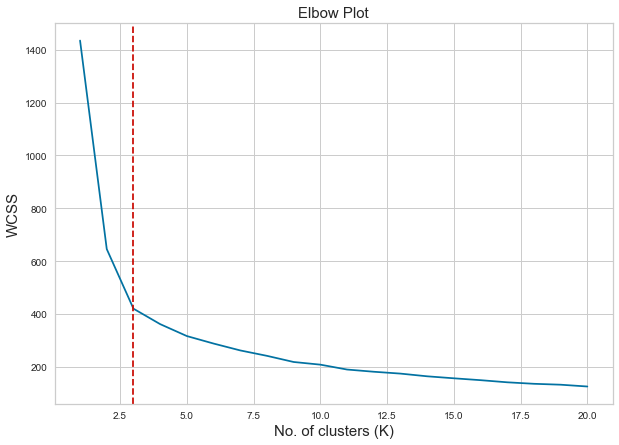

In [26]:
wcss  = []
X = pd.DataFrame(data_Stand, columns = data.drop("Agglomerative Cluster",axis=1).columns)
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
x = range(1, len(wcss)+1)
kn = KneeLocator(x, wcss, curve='convex', direction='decreasing')
print("Number of clusters =",kn.elbow)
fig=plt.figure(figsize=(10, 7))
plt.plot(range(1,21), wcss)
plt.axvline(x=kn.elbow,color='r',linestyle='--')
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
fig.savefig('ORI data_zscore Elbowplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

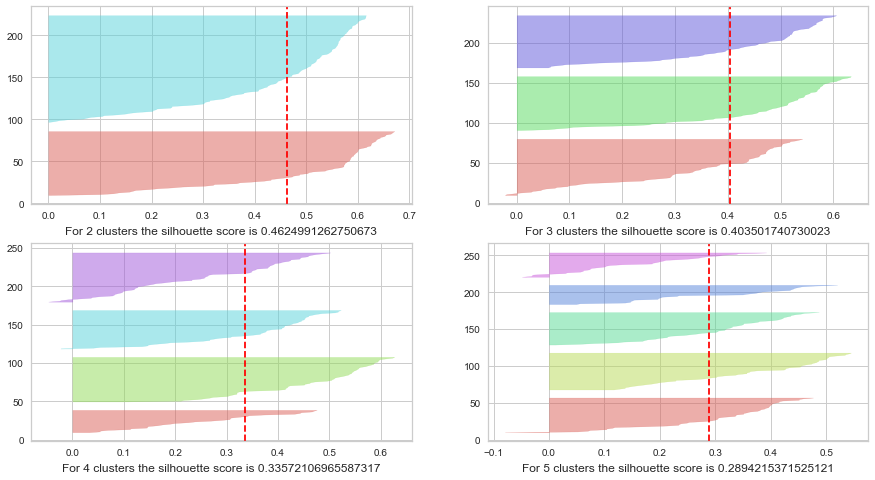

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors=sns.color_palette("hls",i), ax=ax[q-1][mod])
    visualizer.fit(X)
    predict = km.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    ax[q-1][mod].text(0.5,-0.15, "For {} clusters the silhouette score is {}".format(i, score),
                      size=12, ha="center", 
         transform=ax[q-1][mod].transAxes)
fig.savefig('ORI data_zscore silluette.jpg', bbox_inches='tight', dpi=150)
plt.show()    

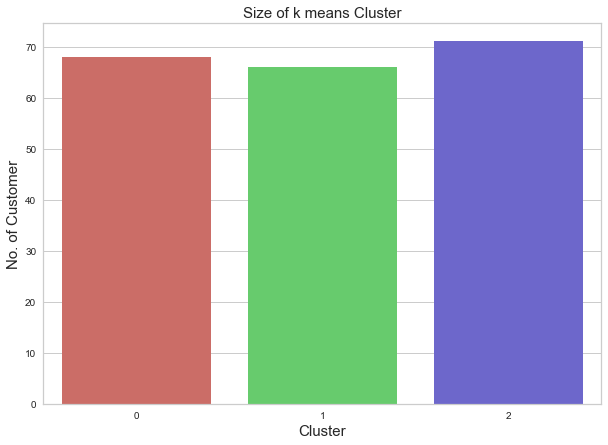

In [28]:
new_clusters = KMeans(n_clusters = kn.elbow, random_state = 10)
new_clusters.fit(data_Stand)
data['KMeans Cluster'] = new_clusters.labels_
fig=plt.figure(figsize=(10, 7))
sns.countplot(data = data, x = 'KMeans Cluster',palette=sns.color_palette("hls",kn.elbow))
plt.title('Size of k means Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Customer', fontsize = 15)
fig.savefig('ORI data_zscore KMeans Cluster countplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

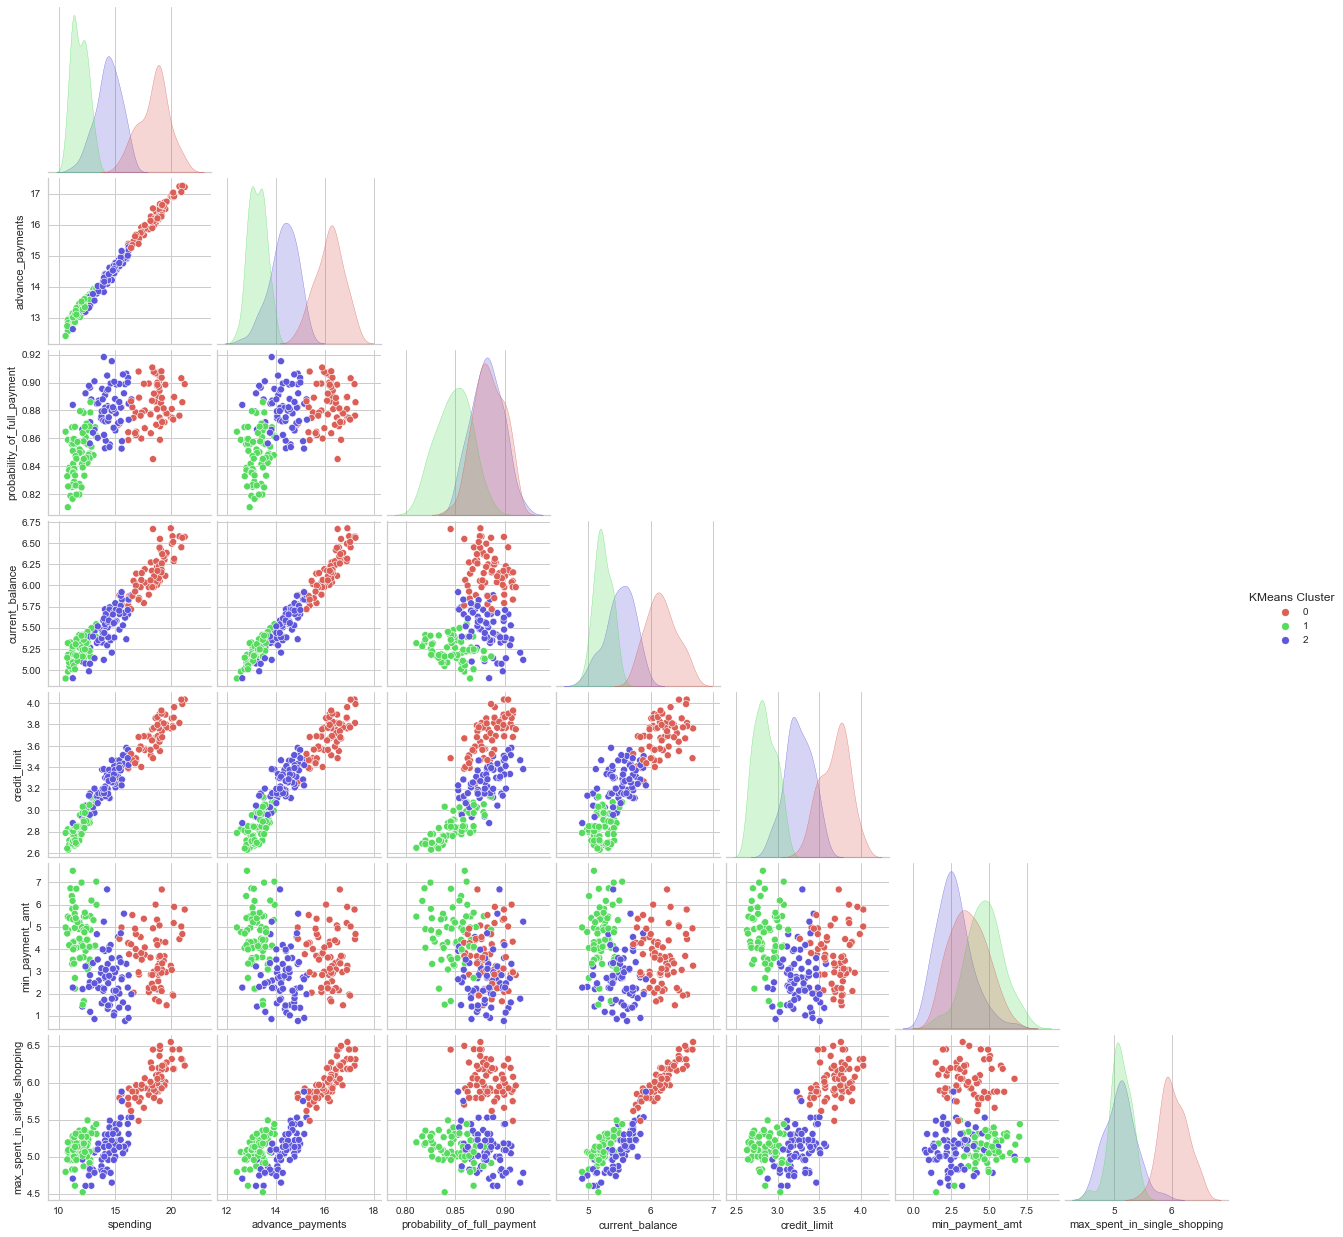

In [29]:
fig=sns.pairplot(data = data.drop("Agglomerative Cluster",axis=1), hue = 'KMeans Cluster', 
                palette=sns.color_palette("hls",kn.elbow), corner=True)
fig.savefig('ORI data_zscore KMeans Cluster pairplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

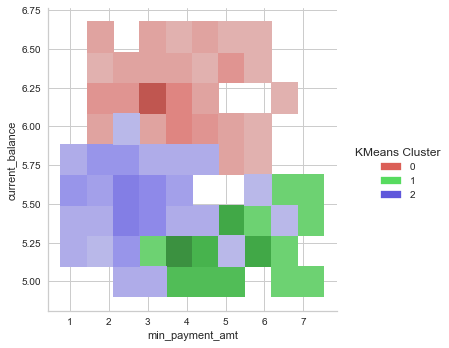

In [30]:
fig=sns.displot(data = data, hue = 'KMeans Cluster', x='min_payment_amt',y='current_balance',
                palette=sns.color_palette("hls",kn.elbow))
fig.savefig('ORI data_zscore KMeans Cluster displot.jpg', bbox_inches='tight', dpi=150)
plt.show()

## Aglomerative Cluster

### Cluster 1

In [31]:
len(data[data['Agglomerative Cluster'] == 0])

127

In [32]:
dfi.export(data[data["Agglomerative Cluster"]==0].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'ORI Agglomerative Cluster=0.png')
data[data["Agglomerative Cluster"]==0].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,12.976693,13.702283,0.865294,5.337409,3.036520,3.660836,5.074299
std,1.480693,0.652299,0.023837,0.209037,0.245617,1.585753,0.198901
min,10.590000,12.410000,0.810700,4.899000,2.630000,0.765100,4.519000
25%,11.730000,13.170000,0.848050,5.175000,2.834500,2.326000,4.961000
50%,12.730000,13.570000,0.865800,5.333000,3.026000,3.586000,5.088000
75%,14.220000,14.210000,0.882700,5.480500,3.206500,4.885500,5.206500
max,16.190000,15.160000,0.918300,5.833000,3.582000,7.524000,5.491000


### Cluster 2

In [33]:
# size of a cluster 1
len(data[data['Agglomerative Cluster'] == 1])

78

In [34]:
# statistical summary of the numerical variables
dfi.export(data[data["Agglomerative Cluster"]==1].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'ORI Agglomerative Cluster=1.png')
data[data['Agglomerative Cluster'] ==1].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,18.068333,16.025385,0.882250,6.123154,3.644641,3.602051,5.967795
std,1.608133,0.678575,0.015665,0.257642,0.207567,1.178042,0.291206
min,14.090000,14.410000,0.845200,5.709000,3.113000,1.472000,5.228000
25%,16.825000,15.520000,0.871825,5.897500,3.485000,2.826500,5.805500
50%,18.500000,16.175000,0.881750,6.112000,3.683500,3.572500,5.963500
75%,19.097500,16.497500,0.896225,6.285000,3.794750,4.436000,6.185000
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000


## KMeans Cluster

### Cluster 1

In [35]:
len(data[data['KMeans Cluster'] == 0])

68

In [36]:
dfi.export(data[data["KMeans Cluster"]==0].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'ORI KMeans Cluster=0.png')
data[data["KMeans Cluster"]==0].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,18.449559,16.184265,0.884010,6.171397,3.691221,3.644574,6.038074
std,1.322658,0.564910,0.014897,0.238662,0.172808,1.206184,0.229802
min,15.380000,14.890000,0.845200,5.718000,3.268000,1.472000,5.484000
25%,17.502500,15.827500,0.874325,6.004000,3.562500,2.850500,5.878500
50%,18.735000,16.225000,0.882600,6.152500,3.706500,3.629000,6.000500
75%,19.142500,16.575000,0.897875,6.321500,3.807000,4.453750,6.190250
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000


### Cluster 2

In [37]:
# size of a cluster 1
len(data[data['KMeans Cluster'] == 1])

66

In [38]:
# statistical summary of the numerical variables
dfi.export(data[data["KMeans Cluster"]==1].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'ORI KMeans Cluster=1.png')
data[data['KMeans Cluster'] ==1].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,11.846364,13.241364,0.848308,5.231045,2.846985,4.667076,5.103788
std,0.704067,0.350564,0.017170,0.138277,0.128658,1.221115,0.182634
min,10.590000,12.410000,0.810700,4.899000,2.630000,1.502000,4.519000
25%,11.262500,13.000000,0.836225,5.137750,2.755750,4.000750,5.001250
50%,11.825000,13.225000,0.848600,5.224000,2.836500,4.764500,5.089000
75%,12.377500,13.470000,0.860575,5.331000,2.965250,5.446000,5.228500
max,13.340000,13.950000,0.886000,5.541000,3.126000,7.524000,5.491000


### Cluster 3

In [39]:
# size of a cluster 1
len(data[data['KMeans Cluster'] == 2])

71

In [40]:
# statistical summary of the numerical variables
dfi.export(data[data["KMeans Cluster"]==2].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'ORI KMeans Cluster=2.png')
data[data['KMeans Cluster'] ==2].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,14.379437,14.305775,0.881786,5.500746,3.253746,2.676454,5.105423
std,1.116728,0.558996,0.015448,0.232297,0.161203,1.158363,0.261576
min,11.230000,12.630000,0.852700,4.902000,2.879000,0.765100,4.605000
25%,13.790000,14.020000,0.871900,5.369500,3.154000,1.951000,4.956000
50%,14.380000,14.370000,0.882000,5.527000,3.245000,2.587000,5.111000
75%,15.185000,14.755000,0.893350,5.676000,3.378000,3.274000,5.226000
max,16.440000,15.270000,0.918300,5.920000,3.582000,6.685000,5.879000


#### With PCA

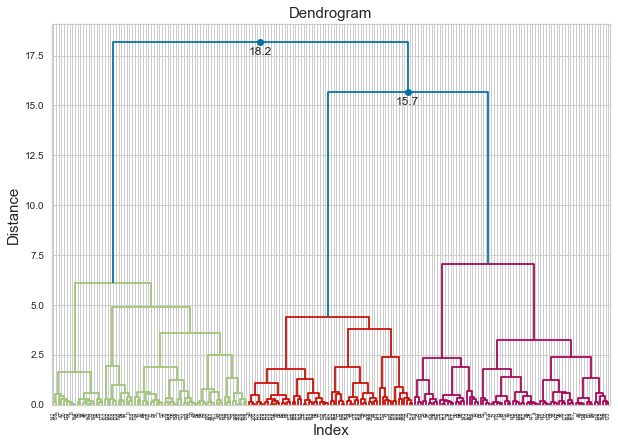

In [41]:
data=pc.factors.copy()
Stand=StandardScaler()
data_Stand=Stand.fit_transform(data)
link_mat = linkage(data_Stand, method = 'ward')
fig=plt.figure(figsize=(10, 7))
plt.title("Dendrograms")  
dendro = dendrogram(link_mat)
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > 8:
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
fig.savefig('PCA data dend.jpg', bbox_inches='tight', dpi=150)
plt.show()

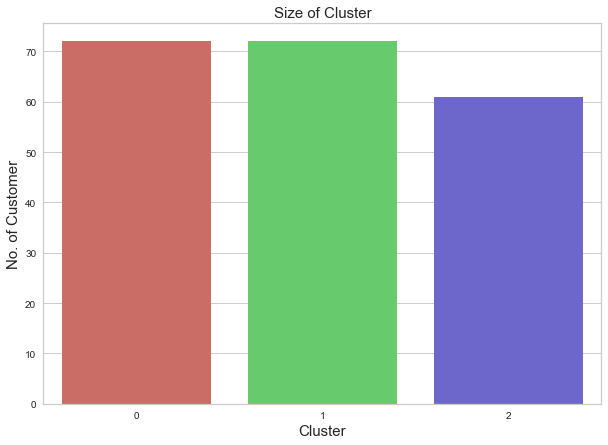

In [42]:
clusters = AgglomerativeClustering(n_clusters=len(list(set(dendro['color_list'])))-1, linkage='ward',affinity='euclidean')
# fit the model on the scaled data
clusters.fit(data_Stand)
# add a column containing cluster number to the original data
data['Agglomerative Cluster'] = clusters.labels_
data_old['Agglomerative Cluster'] = clusters.labels_
# plot the countplot for the cluster size
fig=plt.figure(figsize=(10, 7))
sns.countplot(data = data, x = 'Agglomerative Cluster',palette=sns.color_palette("hls",kn.elbow))
# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Customer', fontsize = 15)
# display the plot
fig.savefig('PCA data_zscore Agglomerative Cluster countplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

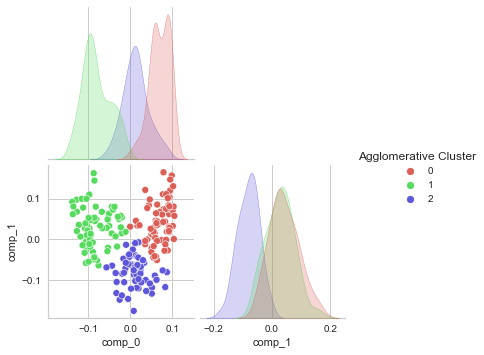

In [43]:
fig=sns.pairplot(data = data, hue = 'Agglomerative Cluster', 
                palette=sns.color_palette("hls",len(list(set(dendro['color_list'])))-1), corner=True)
fig.savefig('PCA data_zscore Agglomerative Cluster pairplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

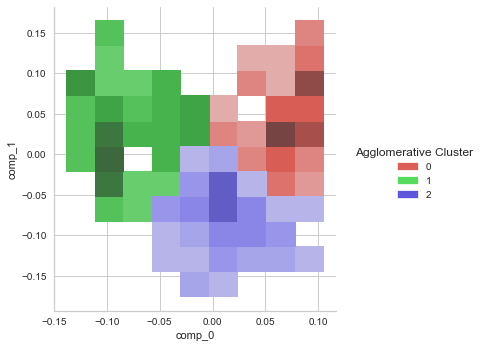

In [44]:
fig=sns.displot(data = data, x='comp_0',
                    y='comp_1',hue = 'Agglomerative Cluster', kind="hist",
                palette=sns.color_palette("hls",len(list(set(dendro['color_list'])))-1))
fig.savefig('PCA data_zscore Agglomerative Cluster displot.jpg', bbox_inches='tight', dpi=150)
plt.show()

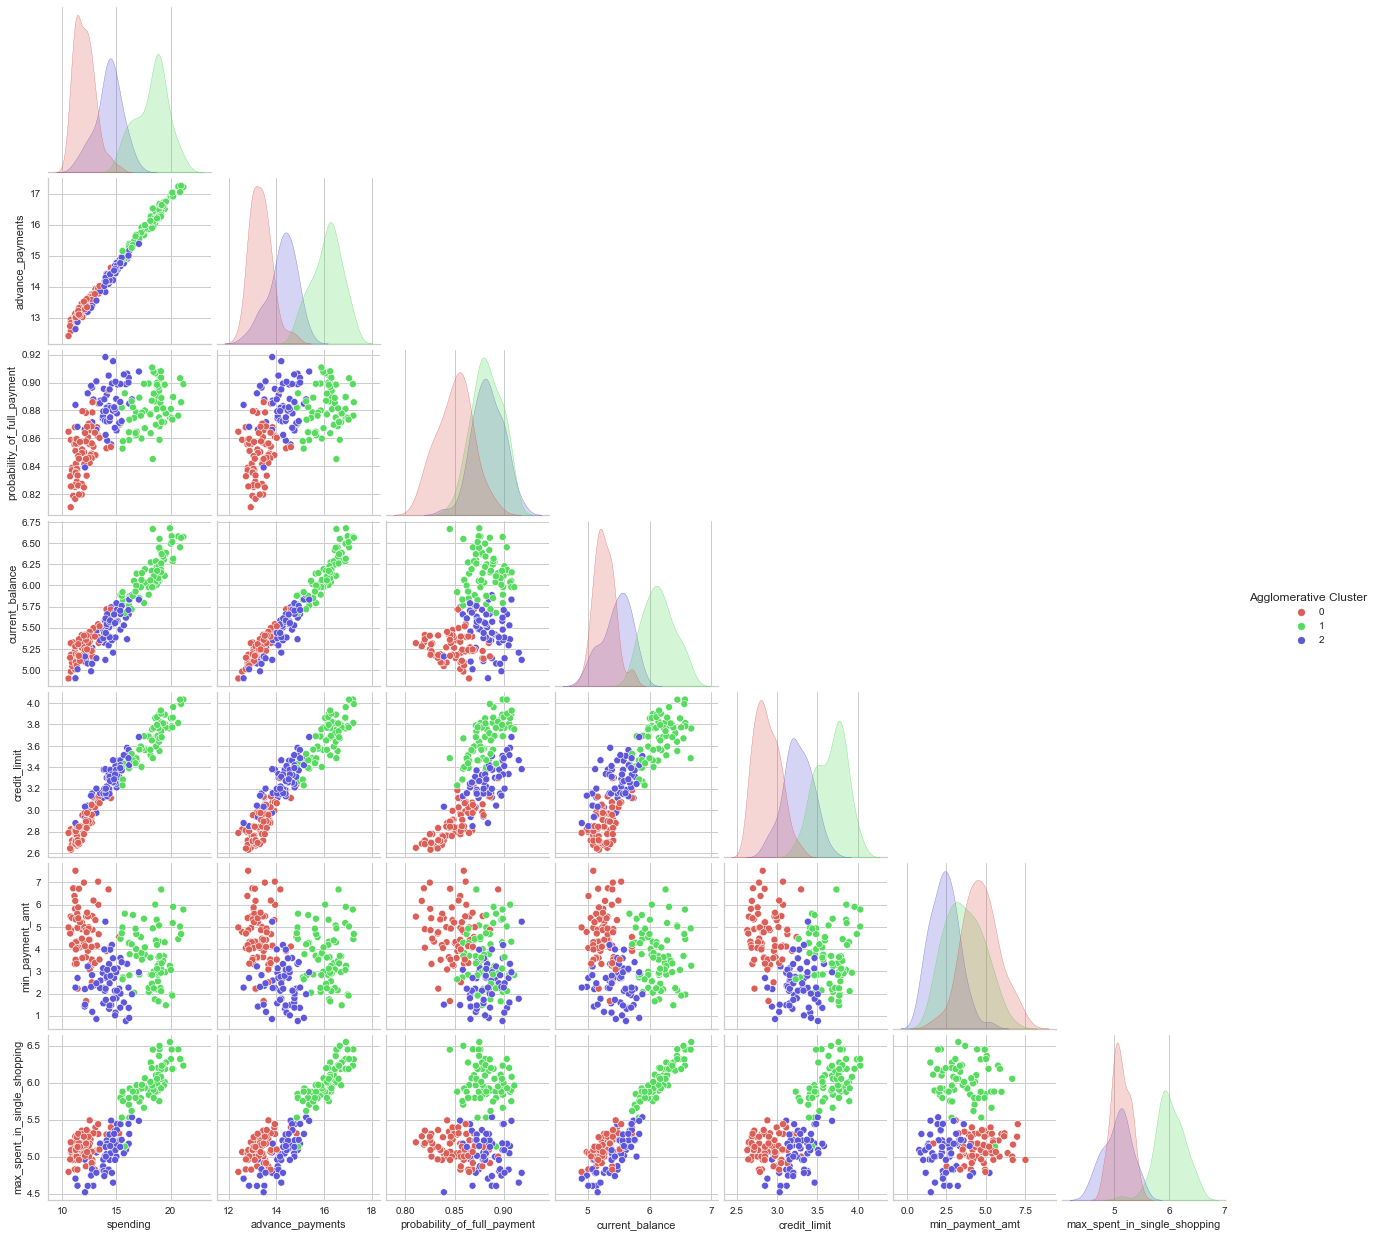

In [45]:
fig=sns.pairplot(data = data_old, hue = 'Agglomerative Cluster', 
                palette=sns.color_palette("hls",len(list(set(dendro['color_list'])))-1), corner=True)
fig.savefig('PCA data_old Agglomerative Cluster pairplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

Number of clusters = 5


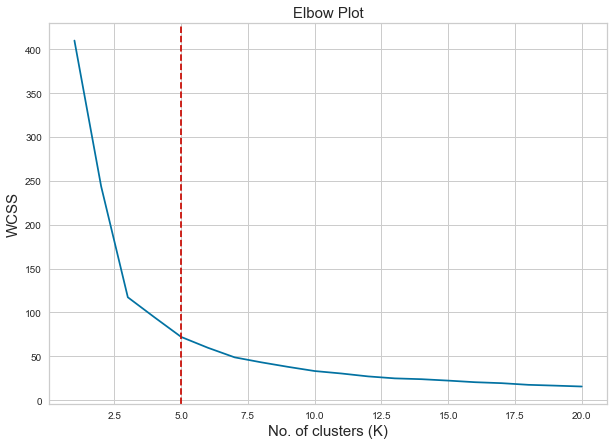

In [46]:
wcss  = []
X = pd.DataFrame(data_Stand, columns = data.drop("Agglomerative Cluster",axis=1).columns)
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
x = range(1, len(wcss)+1)
kn = KneeLocator(x, wcss, curve='convex', direction='decreasing')
# instantiate clustering method with 2 clusters and 'ward' linkage method
print("Number of clusters =",kn.elbow)
# visualize the elbow plot to get the optimal value of K
fig=plt.figure(figsize=(10, 7))
plt.plot(range(1,21), wcss)
plt.axvline(x=kn.elbow,color='r',linestyle='--')
# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
fig.savefig('PCA data_zscore Elbowplot.jpg', bbox_inches='tight', dpi=150)
# display the plot
plt.show()

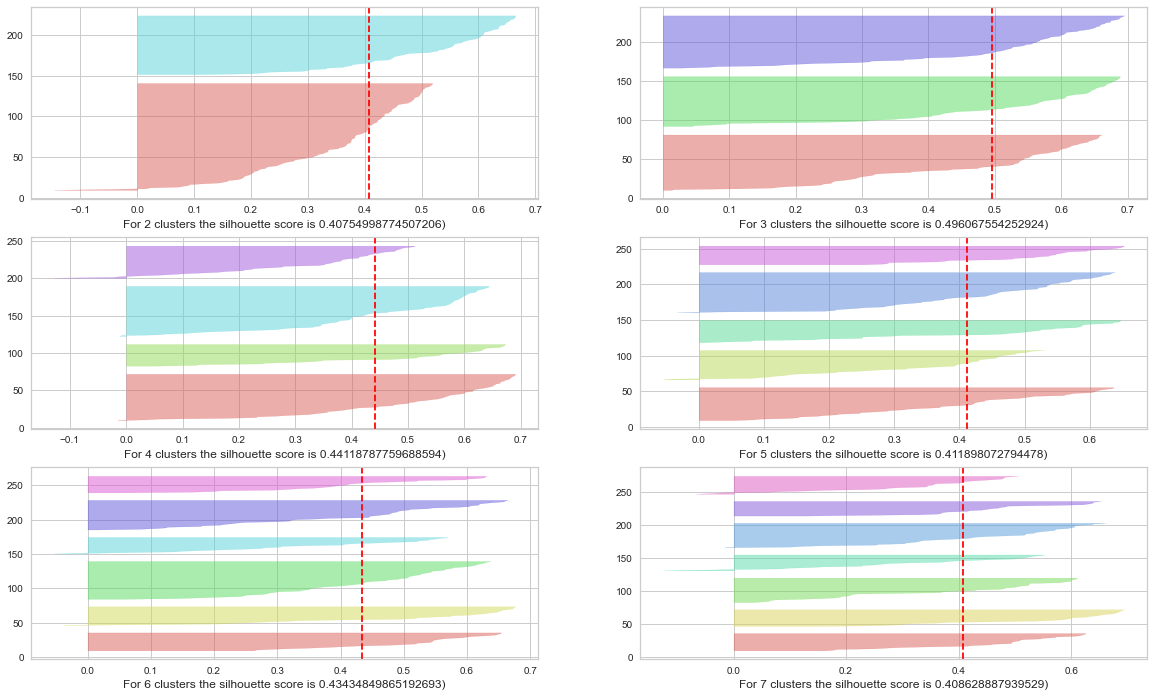

In [47]:
fig, ax = plt.subplots(3, 2, figsize=(20,12))
for i in [2, 3, 4, 5,6,7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=10)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors=sns.color_palette("hls",i), ax=ax[q-1][mod])
    visualizer.fit(X)
    predict = km.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    ax[q-1][mod].text(0.5,-0.15, "For {} clusters the silhouette score is {})".format(i, score),
                      size=12, ha="center", 
         transform=ax[q-1][mod].transAxes)
fig.savefig('PCA data_zscore silluette.jpg', bbox_inches='tight', dpi=150)
plt.show()    

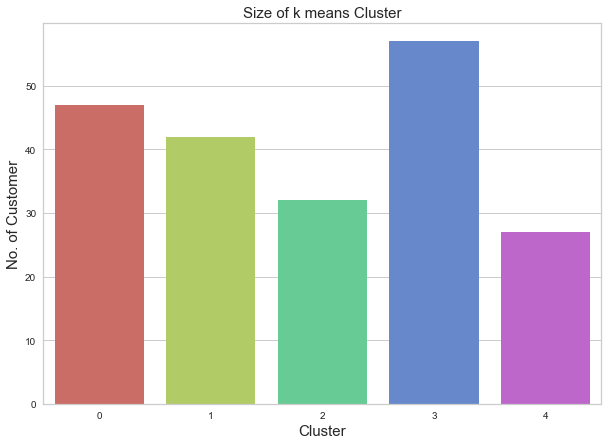

In [48]:
new_clusters = KMeans(n_clusters = kn.elbow, random_state = 10)
new_clusters.fit(data_Stand)
data['KMeans Cluster'] = new_clusters.labels_
data_old['KMeans Cluster'] = new_clusters.labels_
fig=plt.figure(figsize=(10, 7))
sns.countplot(data = data, x = 'KMeans Cluster',palette=sns.color_palette("hls",kn.elbow))
plt.title('Size of k means Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Customer', fontsize = 15)
fig.savefig('PCA data_zscore KMeans Cluster countplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

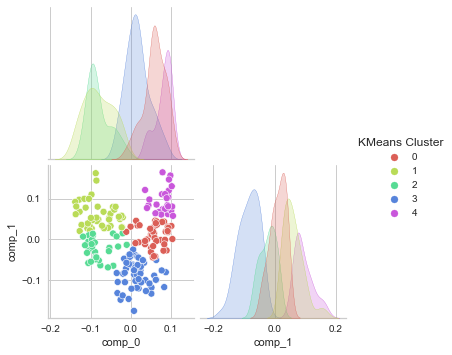

In [49]:
fig=sns.pairplot(data = data.drop("Agglomerative Cluster",axis=1), hue = 'KMeans Cluster', 
                palette=sns.color_palette("hls",kn.elbow), corner=True)
fig.savefig('PCA data_zscore KMeans Cluster pairplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

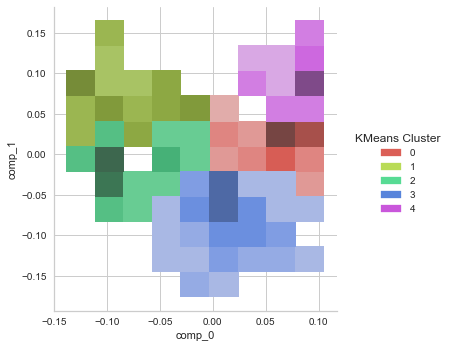

In [50]:
fig=sns.displot(data = data, x='comp_0',
                    y='comp_1',hue = 'KMeans Cluster', kind="hist",
                palette=sns.color_palette("hls",kn.elbow))
fig.savefig('PCA data_zscore KMeans Cluster displot.jpg', bbox_inches='tight', dpi=150)
plt.show()

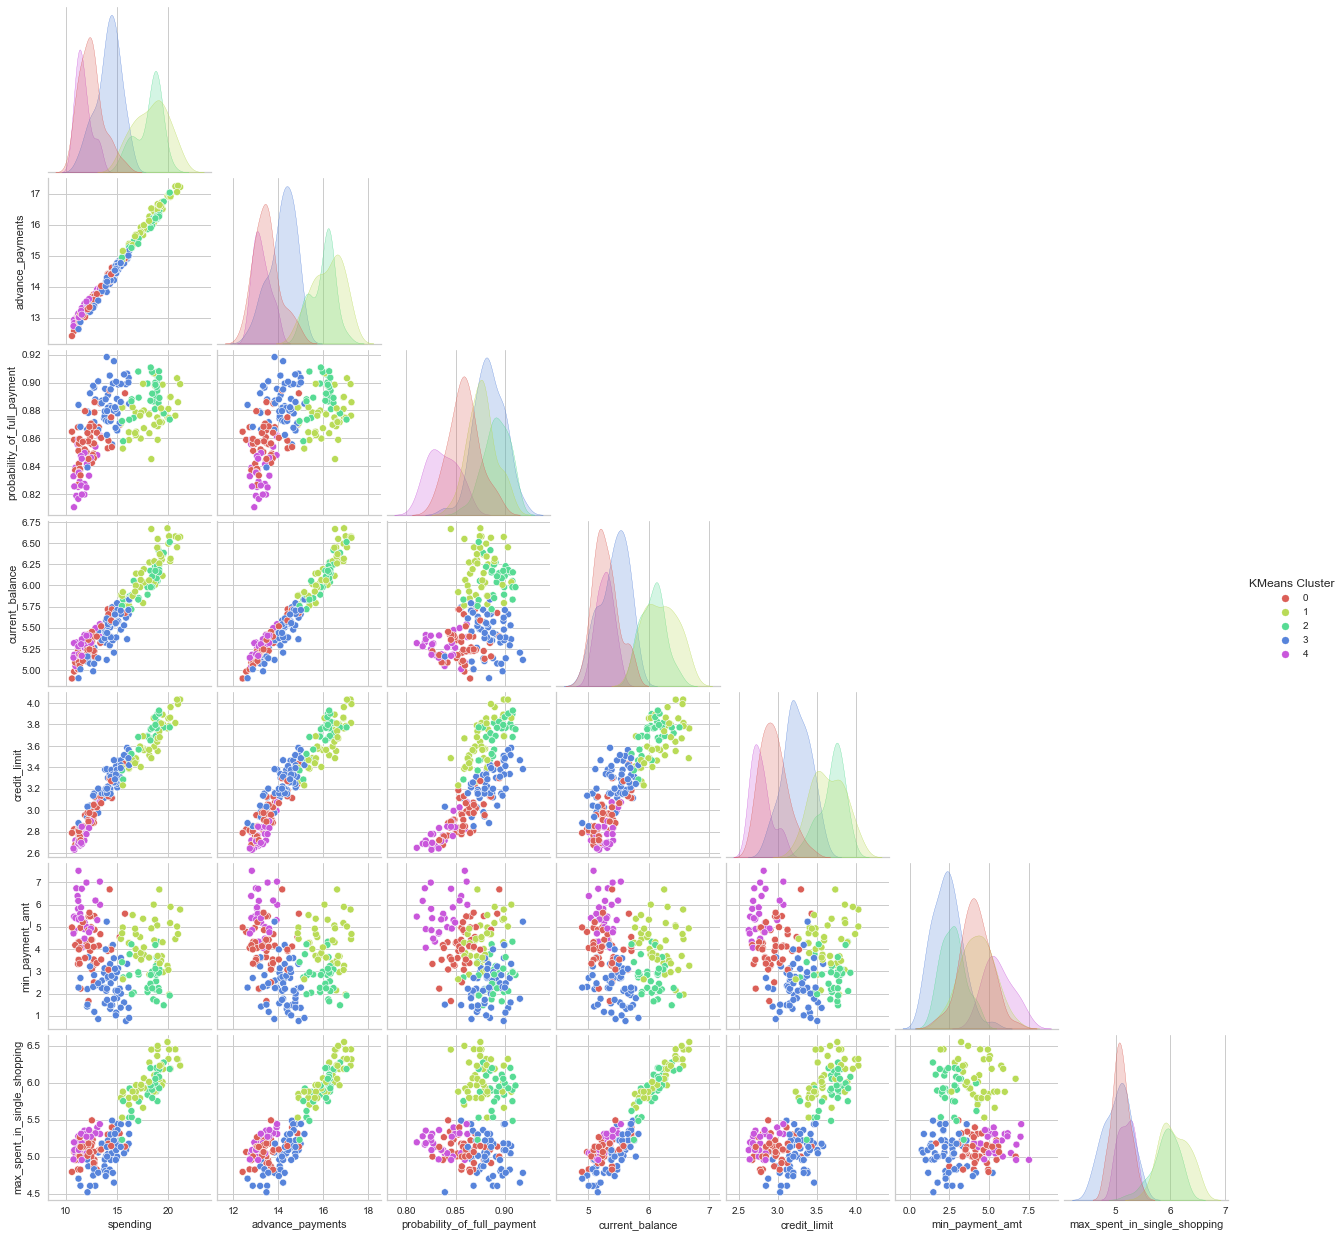

In [51]:
fig=sns.pairplot(data = data_old.drop("Agglomerative Cluster",axis=1), hue = 'KMeans Cluster', 
                palette=sns.color_palette("hls",kn.elbow), corner=True)
fig.savefig('PCA data_old KMeans Cluster pairplot.jpg', bbox_inches='tight', dpi=150)
plt.show()

In [52]:
data=data_old.copy()

## Aglomerative Cluster

### Cluster 1

In [53]:
len(data[data['Agglomerative Cluster'] == 0])

72

In [54]:
dfi.export(data[data["Agglomerative Cluster"]==0].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'PCA Agglomerative Cluster=0.png')
data[data["Agglomerative Cluster"]==0].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,12.069861,13.345417,0.850240,5.267375,2.875458,4.682875,5.119667
std,0.957113,0.460388,0.017936,0.166441,0.154688,1.160447,0.162397
min,10.590000,12.410000,0.810700,4.899000,2.630000,1.661000,4.794000
25%,11.270000,13.017500,0.837425,5.156250,2.761750,3.968750,5.001750
50%,12.015000,13.325000,0.851600,5.241500,2.846000,4.686000,5.091500
75%,12.640000,13.592500,0.861475,5.390500,2.976500,5.414000,5.264750
max,15.260000,14.850000,0.894400,5.717000,3.298000,7.524000,5.491000


### Cluster 2

In [55]:
# size of a cluster 1
len(data[data['Agglomerative Cluster'] == 1])

72

In [56]:
# statistical summary of the numerical variables
dfi.export(data[data["Agglomerative Cluster"]==1].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'PCA Agglomerative Cluster=1.png')
data[data['Agglomerative Cluster'] ==1].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,18.279722,16.117361,0.882822,6.152111,3.668486,3.657875,6.012875
std,1.456205,0.614945,0.015030,0.246270,0.189308,1.212920,0.255302
min,15.380000,14.860000,0.845200,5.674000,3.231000,1.472000,5.136000
25%,17.225000,15.667500,0.873100,5.979000,3.505500,2.833500,5.877000
50%,18.685000,16.200000,0.882150,6.144500,3.691500,3.629000,5.969000
75%,19.132500,16.532500,0.894875,6.306000,3.802250,4.481250,6.187250
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000


### Cluster 3

In [57]:
# size of a cluster 1
len(data[data['Agglomerative Cluster'] == 2])

61

In [58]:
# statistical summary of the numerical variables
dfi.export(data[data["Agglomerative Cluster"]==2].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'PCA Agglomerative Cluster=2.png')
data[data['Agglomerative Cluster'] ==2].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,14.298361,14.243443,0.884054,5.463180,3.258295,2.382823,5.055426
std,1.233948,0.593568,0.015344,0.237821,0.177824,0.904284,0.247919
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000
25%,13.780000,13.940000,0.872600,5.348000,3.155000,1.717000,4.830000
50%,14.370000,14.290000,0.883100,5.504000,3.258000,2.270000,5.088000
75%,15.030000,14.670000,0.896400,5.656000,3.379000,2.956000,5.219000
max,17.080000,15.380000,0.918300,5.884000,3.683000,5.234000,5.533000


## KMeans Cluster

### Cluster 1

In [59]:
len(data[data['KMeans Cluster'] == 0])

47

In [60]:
dfi.export(data[data["KMeans Cluster"]==0].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'PCA KMeans Cluster=0.png')
data[data["KMeans Cluster"]==0].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,12.451277,13.481489,0.858964,5.289170,2.948872,4.150809,5.090298
std,1.173885,0.572249,0.015024,0.201216,0.169957,0.952813,0.157022
min,10.590000,12.410000,0.826600,4.899000,2.675000,1.661000,4.794000
25%,11.420000,13.045000,0.849700,5.150000,2.815500,3.532000,5.001000
50%,12.370000,13.450000,0.857900,5.236000,2.953000,4.116000,5.088000
75%,12.795000,13.730000,0.868000,5.396000,3.051500,4.815000,5.176000
max,15.780000,14.910000,0.894400,5.717000,3.434000,6.685000,5.491000


### Cluster 2

In [61]:
# size of a cluster 1
len(data[data['KMeans Cluster'] == 1])

42

In [62]:
# statistical summary of the numerical variables
dfi.export(data[data["KMeans Cluster"]==1].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'PCA KMeans Cluster=1.png')
data[data['KMeans Cluster'] ==1].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,18.324524,16.190476,0.876600,6.202429,3.645667,4.246714,6.071048
std,1.634169,0.682960,0.013745,0.266670,0.208620,1.050823,0.256561
min,15.380000,14.860000,0.845200,5.762000,3.231000,1.955000,5.528000
25%,16.967500,15.662500,0.867650,6.000000,3.484250,3.549250,5.877500
50%,18.620000,16.335000,0.876300,6.219500,3.616500,4.297000,6.032000
75%,19.440000,16.697500,0.882300,6.426000,3.807750,4.962250,6.264250
max,21.180000,17.250000,0.906600,6.675000,4.033000,6.682000,6.550000


### Cluster 3

In [63]:
# size of a cluster 1
len(data[data['KMeans Cluster'] == 2])

32

In [64]:
# statistical summary of the numerical variables
dfi.export(data[data["KMeans Cluster"]==2].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'PCA KMeans Cluster=2.png')
data[data['KMeans Cluster'] ==2].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,18.116875,15.972187,0.891313,6.070281,3.691813,2.742156,5.907875
std,1.224638,0.509616,0.012744,0.194415,0.158746,0.750153,0.240372
min,15.490000,14.940000,0.858000,5.718000,3.286000,1.472000,5.228000
25%,17.110000,15.527500,0.885300,5.888500,3.629750,2.168250,5.783500
50%,18.635000,16.175000,0.891150,6.095500,3.737000,2.830000,5.923000
75%,18.902500,16.290000,0.900125,6.175500,3.788500,3.093000,6.083500
max,20.160000,17.030000,0.910800,6.513000,3.930000,4.334000,6.273000


### Cluster 4

In [65]:
# size of a cluster 1
len(data[data['KMeans Cluster'] == 3])

57

In [66]:
# statistical summary of the numerical variables
dfi.export(data[data["KMeans Cluster"]==3].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'PCA KMeans Cluster=3.png')
data[data['KMeans Cluster'] ==3].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,14.154211,14.169825,0.884277,5.432895,3.241702,2.343846,5.029579
std,1.201471,0.583709,0.015058,0.231277,0.173598,0.905993,0.239800
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000
25%,13.540000,13.850000,0.872800,5.291000,3.153000,1.599000,4.825000
50%,14.330000,14.260000,0.883100,5.477000,3.221000,2.269000,5.046000
75%,14.990000,14.600000,0.896400,5.609000,3.377000,2.828000,5.180000
max,16.190000,15.160000,0.918300,5.833000,3.582000,5.234000,5.487000


### Cluster 5

In [67]:
# size of a cluster 1
len(data[data['KMeans Cluster'] == 4])

27

In [68]:
# statistical summary of the numerical variables
dfi.export(data[data["KMeans Cluster"]==4].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe(), 'PCA KMeans Cluster=4.png')
data[data['KMeans Cluster'] ==4].drop(["Agglomerative Cluster", "KMeans Cluster"],axis=1).describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,11.703704,13.250000,0.836796,5.275556,2.788519,5.595852,5.183630
std,0.756628,0.367967,0.014765,0.136174,0.129370,0.895658,0.142637
min,10.740000,12.730000,0.810700,5.011000,2.630000,4.062000,4.956000
25%,11.200000,13.005000,0.825450,5.178000,2.691000,4.911000,5.069000
50%,11.490000,13.130000,0.835500,5.279000,2.763000,5.398000,5.182000
75%,12.030000,13.485000,0.847650,5.376000,2.842500,6.177000,5.307000
max,13.340000,13.950000,0.862000,5.541000,3.074000,7.524000,5.440000
